In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
#from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
# from sklearn import cross_validation, metrics
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

from numpy import sort
from sklearn.feature_selection import SelectFromModel

# # Ignore warnings
# import warnings
# warnings.simplefilter('ignore')

In [2]:
# Import the train set and test set
# train_data2 = pd.read_csv("trainset.csv", delimiter=",")
# test_data2 = pd.read_csv("testset.csv", delimiter=",")

# train = pd.read_csv("normalized_train_dataset.csv", delimiter=",")
# test = pd.read_csv("normalized_test_dataset.csv", delimiter=",")
train = pd.read_csv("final_train.csv", delimiter=",")
test = pd.read_csv("final_test.csv", delimiter=",")

In [3]:
train.shape, test.shape

((9567, 35), (3190, 34))

In [4]:
target = 'Product'
IDcol = 'ID'

In [5]:
def modelfit(alg, dtrain, predictors,numfeat,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=['merror', 'mlogloss'], early_stopping_rounds=early_stopping_rounds, 
                          verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
        #print(cvresult)
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Product'],eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Product'].values, dtrain_predictions))
    print("f1_micro : %.4g" % metrics.f1_score(dtrain['Product'], dtrain_predictions, average='micro'))
    print("f1_macro : %.4g" % metrics.f1_score(dtrain['Product'], dtrain_predictions, average='macro'))
    print("f1_weighted : %.4g" % metrics.f1_score(dtrain['Product'], dtrain_predictions, average='weighted'))
                    
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
    plot_importance(alg)
    plt.show()
    thresholds = alg.feature_importances_
    print("Feature_Importances: ")
    print(dtrain.columns[thresholds.argsort()[-numfeat:][::-1]])
    print("Model: " + str(alg.get_xgb_params()))
    print("n_estimator: " + str(cvresult.shape[0]))
    return cvresult.shape[0]

In [6]:
def important_features(model, nfeatures = 10):
    model.fit()
    thresholds = model.feature_importances_
    
    return train.column[thresholds.argsort()[-nfeatures:][::-1]]

# Step 1- Find the number of estimators for a high learning rate

In [7]:
train.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ChurnScore', 'AirportConnectionsDuration',
       'AirportConnectionsCount', 'StationConnectionsDuration',
       'StationConnectionsCount', 'ParkingConnectionsDuration',
       'ParkingConnectionsCount', 'File-Transfer', 'Games',
       'Instant-Messaging-Applications', 'Mail', 'Music-Streaming',
       'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'IsModified', 'CustomerAge', 'Region', 'Province',
       'Product'],
      dtype='object')

[0]	train-merror:0.406815+0.00167685	train-mlogloss:1.3346+0.000475091	test-merror:0.411832+0.00747232	test-mlogloss:1.33585+0.000819127
[1]	train-merror:0.406867+0.00220602	train-mlogloss:1.29158+0.000758169	test-merror:0.412145+0.0084519	test-mlogloss:1.29408+0.00129246
[2]	train-merror:0.406005+0.00243155	train-mlogloss:1.25511+0.0011552	test-merror:0.413085+0.00821859	test-mlogloss:1.25893+0.00197002
[3]	train-merror:0.406449+0.00254358	train-mlogloss:1.22393+0.00142489	test-merror:0.413504+0.00832785	test-mlogloss:1.22881+0.00233658
[4]	train-merror:0.405796+0.00254206	train-mlogloss:1.19688+0.00176565	test-merror:0.412249+0.00866306	test-mlogloss:1.20313+0.00276407
[5]	train-merror:0.404933+0.00248621	train-mlogloss:1.17346+0.00199521	test-merror:0.412145+0.00757225	test-mlogloss:1.1808+0.00342002
[6]	train-merror:0.40394+0.00196138	train-mlogloss:1.1531+0.00213388	test-merror:0.413085+0.00756061	test-mlogloss:1.16166+0.00394275
[7]	train-merror:0.403287+0.00276715	train-mlogloss

[61]	train-merror:0.371459+0.00189316	train-mlogloss:0.934946+0.00358573	test-merror:0.406292+0.00770848	test-mlogloss:1.00268+0.00998201
[62]	train-merror:0.370466+0.00155545	train-mlogloss:0.933706+0.00360642	test-merror:0.406501+0.00716577	test-mlogloss:1.00232+0.0100576
[63]	train-merror:0.369917+0.00170002	train-mlogloss:0.93244+0.0036089	test-merror:0.406083+0.00680886	test-mlogloss:1.00195+0.0101173
[64]	train-merror:0.368663+0.00173482	train-mlogloss:0.931204+0.00369422	test-merror:0.406397+0.00794732	test-mlogloss:1.00172+0.0101267
[65]	train-merror:0.36814+0.00194167	train-mlogloss:0.93004+0.00368498	test-merror:0.404933+0.00730945	test-mlogloss:1.00139+0.0100896
[66]	train-merror:0.367174+0.00196751	train-mlogloss:0.928779+0.00374434	test-merror:0.405351+0.00668354	test-mlogloss:1.0012+0.0100236
[67]	train-merror:0.366834+0.00151564	train-mlogloss:0.927587+0.00392916	test-merror:0.405247+0.00662807	test-mlogloss:1.00093+0.0100952
[68]	train-merror:0.366285+0.00168246	train-m

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.6444
f1_micro : 0.6444
f1_macro : 0.4228
f1_weighted : 0.5837


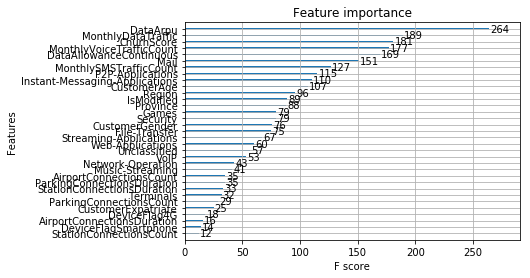

Feature_Importances: 
Index(['DeviceFlag4G', 'MonthlySMSTrafficCount', 'CustomerExpatriate',
       'DeviceFlagSmartphone', 'DataArpu', 'Instant-Messaging-Applications',
       'MonthlyVoiceTrafficCount', 'Network-Operation', 'Games', 'IsModified',
       'CustomerAge', 'Web-Applications', 'Region', 'P2P-Applications',
       'File-Transfer', 'MonthlyDataTraffic', 'ParkingConnectionsCount',
       'Security', 'VoIP', 'Terminals', 'Unclassified', 'Music-Streaming',
       'Mail', 'StationConnectionsCount', 'AirportConnectionsDuration',
       'AirportConnectionsCount', 'Streaming-Applications',
       'ParkingConnectionsDuration'],
      dtype='object')
Model: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 

100

In [8]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb0 = XGBClassifier(
        objective='multi:softmax',
        num_class=4)
# print(train[predictors].values)
modelfit(xgb0, train, predictors, 28)

In [9]:
xgb0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [10]:
learning_rate = 0.1
n_estimators = 1000
max_depth = 5
min_child_weight = 1
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
reg_alpha = 0.005
cv = 5

[0]	train-merror:0.389646+0.00447678	train-mlogloss:1.32974+0.00102939	test-merror:0.421135+0.00649325	test-mlogloss:1.33431+0.00122373
[1]	train-merror:0.377208+0.00308654	train-mlogloss:1.28014+0.00105101	test-merror:0.414968+0.00546756	test-mlogloss:1.2898+0.00219806
[2]	train-merror:0.372896+0.00214443	train-mlogloss:1.23831+0.00114294	test-merror:0.410056+0.00794913	test-mlogloss:1.2528+0.00301248
[3]	train-merror:0.371694+0.00354464	train-mlogloss:1.20194+0.00159335	test-merror:0.408592+0.00722293	test-mlogloss:1.2217+0.00388726
[4]	train-merror:0.369891+0.00325515	train-mlogloss:1.16929+0.00169883	test-merror:0.409219+0.00783391	test-mlogloss:1.19381+0.00426843
[5]	train-merror:0.366782+0.00306893	train-mlogloss:1.14107+0.00216665	test-merror:0.408697+0.00860657	test-mlogloss:1.17021+0.00468846
[6]	train-merror:0.364613+0.00327366	train-mlogloss:1.11589+0.00241007	test-merror:0.407233+0.00747179	test-mlogloss:1.14957+0.00491245
[7]	train-merror:0.362731+0.00419562	train-mlogloss

[60]	train-merror:0.276628+0.00204558	train-mlogloss:0.774573+0.00451011	test-merror:0.398976+0.00478395	test-mlogloss:0.986502+0.0135005
[61]	train-merror:0.275687+0.0019518	train-mlogloss:0.771795+0.0044551	test-merror:0.399185+0.00500883	test-mlogloss:0.986307+0.0136207
[62]	train-merror:0.274485+0.0019996	train-mlogloss:0.769254+0.00420863	test-merror:0.399185+0.00529336	test-mlogloss:0.986096+0.0137116
[63]	train-merror:0.272839+0.00225164	train-mlogloss:0.766428+0.0038384	test-merror:0.39908+0.00634705	test-mlogloss:0.986059+0.0137118
[64]	train-merror:0.270984+0.00261186	train-mlogloss:0.763425+0.0041069	test-merror:0.398244+0.0058759	test-mlogloss:0.985382+0.0135464
[65]	train-merror:0.269938+0.00266057	train-mlogloss:0.760846+0.00402261	test-merror:0.397408+0.00548483	test-mlogloss:0.985289+0.0135956
[66]	train-merror:0.268867+0.00303661	train-mlogloss:0.758395+0.00399332	test-merror:0.397617+0.00547197	test-mlogloss:0.985356+0.0134855
[67]	train-merror:0.267482+0.00287277	tra

[120]	train-merror:0.210306+0.00162906	train-mlogloss:0.64521+0.0047531	test-merror:0.399499+0.00797161	test-mlogloss:0.986143+0.0143787
[121]	train-merror:0.209575+0.00187217	train-mlogloss:0.643499+0.00483521	test-merror:0.399394+0.00881665	test-mlogloss:0.986224+0.0142845
[122]	train-merror:0.208712+0.00175961	train-mlogloss:0.641946+0.00489273	test-merror:0.39908+0.00830193	test-mlogloss:0.98658+0.0142376
[123]	train-merror:0.207797+0.00203322	train-mlogloss:0.640024+0.00527152	test-merror:0.398767+0.00803508	test-mlogloss:0.986453+0.014141
[124]	train-merror:0.206883+0.00214929	train-mlogloss:0.637995+0.00495136	test-merror:0.399707+0.00842706	test-mlogloss:0.986581+0.0142807
[125]	train-merror:0.206256+0.00239845	train-mlogloss:0.63618+0.00494611	test-merror:0.398871+0.00747503	test-mlogloss:0.986648+0.0143777
[126]	train-merror:0.205289+0.00277649	train-mlogloss:0.634271+0.00500059	test-merror:0.399603+0.00728214	test-mlogloss:0.986954+0.0142075
[127]	train-merror:0.203747+0.002

[180]	train-merror:0.158801+0.00198994	train-mlogloss:0.549028+0.00477372	test-merror:0.400648+0.00659845	test-mlogloss:0.993135+0.0132375
[181]	train-merror:0.158253+0.00188192	train-mlogloss:0.547677+0.00466211	test-merror:0.40023+0.00592633	test-mlogloss:0.993296+0.0130904
[182]	train-merror:0.156946+0.00141917	train-mlogloss:0.545965+0.00494419	test-merror:0.400962+0.00628703	test-mlogloss:0.993197+0.0130566
[183]	train-merror:0.156345+0.00170628	train-mlogloss:0.544747+0.00489321	test-merror:0.400544+0.00645327	test-mlogloss:0.993365+0.0129501
[184]	train-merror:0.15577+0.00182885	train-mlogloss:0.543322+0.00475589	test-merror:0.40023+0.00672763	test-mlogloss:0.993645+0.012978
[185]	train-merror:0.155117+0.00190272	train-mlogloss:0.541915+0.00469514	test-merror:0.400543+0.00640908	test-mlogloss:0.993666+0.0130664
[186]	train-merror:0.154045+0.00176848	train-mlogloss:0.540601+0.00447701	test-merror:0.40138+0.00613255	test-mlogloss:0.993952+0.0129832
[187]	train-merror:0.153549+0.00

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.744
f1_micro : 0.744
f1_macro : 0.6266
f1_weighted : 0.7175


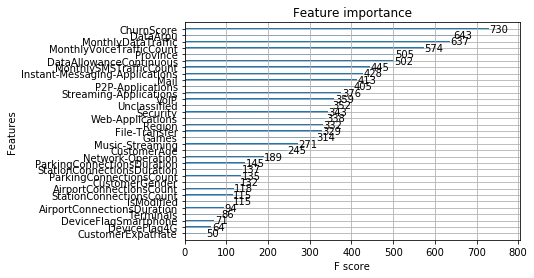

Feature_Importances: 
Index(['CustomerExpatriate', 'DeviceFlag4G', 'MonthlySMSTrafficCount',
       'DeviceFlagSmartphone', 'Region', 'DataArpu',
       'MonthlyVoiceTrafficCount', 'Games', 'Instant-Messaging-Applications',
       'Network-Operation', 'Security', 'Unclassified', 'Terminals',
       'P2P-Applications', 'VoIP', 'CustomerAge', 'ParkingConnectionsCount',
       'File-Transfer', 'Mail', 'IsModified', 'Music-Streaming',
       'StationConnectionsCount', 'AirportConnectionsCount',
       'ParkingConnectionsDuration', 'MonthlyDataTraffic',
       'AirportConnectionsDuration', 'StationConnectionsDuration',
       'Web-Applications'],
      dtype='object')
Model: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 95, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1,

In [11]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='multi:softprob',
        num_class=4,
        nthread=4,
        scale_pos_weight=1,
        seed=27)
n_estimators = modelfit(xgb1, train, predictors, 28)

In [12]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample,
                                        colsample_bytree=colsample_bytree, objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='f1_micro',n_jobs=4,iid=False, cv=cv,verbose=1,  return_train_score=True)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_['params'], gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   57.6s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.6min finished


([{'max_depth': 3, 'min_child_weight': 1},
  {'max_depth': 3, 'min_child_weight': 3},
  {'max_depth': 3, 'min_child_weight': 5},
  {'max_depth': 5, 'min_child_weight': 1},
  {'max_depth': 5, 'min_child_weight': 3},
  {'max_depth': 5, 'min_child_weight': 5},
  {'max_depth': 7, 'min_child_weight': 1},
  {'max_depth': 7, 'min_child_weight': 3},
  {'max_depth': 7, 'min_child_weight': 5},
  {'max_depth': 9, 'min_child_weight': 1},
  {'max_depth': 9, 'min_child_weight': 3},
  {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 1},
 0.5868105430519608)

In [13]:
#gsearch1.cv_results_['params'],

In [14]:
max_depth = gsearch1.best_params_['max_depth']
min_child_weight = gsearch1.best_params_['min_child_weight']
max_depth,min_child_weight

(9, 1)

In [15]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test2 = {
    'max_depth':[max_depth-1,max_depth,max_depth+1],
    'min_child_weight':[min_child_weight-1,min_child_weight,min_child_weight+1]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  1.9min finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.58608, std: 0.01297, params: {'max_depth': 8, 'min_child_weight': 0},
  mean: 0.59130, std: 0.01540, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.58535, std: 0.01200, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: 0.59099, std: 0.01027, params: {'max_depth': 9, 'min_child_weight': 0},
  mean: 0.58681, std: 0.01050, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.58733, std: 0.01415, params: {'max_depth': 9, 'min_child_weight': 2},
  mean: 0.59183, std: 0.00945, params: {'max_depth': 10, 'min_child_weight': 0},
  mean: 0.59089, std: 0.01203, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: 0.58660, std: 0.01544, params: {'max_depth': 10, 'min_child_weight': 2}],
 {'max_depth': 10, 'min_child_weight': 0},
 0.5918268724483076)

In [16]:
max_depth = gsearch2.best_params_['max_depth']
min_child_weight = gsearch2.best_params_['min_child_weight']
max_depth,min_child_weight

(10, 0)

In [17]:
#Grid seach on subsample and max_features#Grid se 
#Choose all predictors except target & IDcols
param_test2b = {
    'min_child_weight':[min_child_weight,min_child_weight+2,min_child_weight+4,min_child_weight+6]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch2b.fit(train[predictors],train[target])
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   57.5s finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59183, std: 0.00945, params: {'min_child_weight': 0},
  mean: 0.58660, std: 0.01544, params: {'min_child_weight': 2},
  mean: 0.58315, std: 0.01007, params: {'min_child_weight': 4},
  mean: 0.58462, std: 0.01212, params: {'min_child_weight': 6}],
 {'min_child_weight': 0},
 0.5918268724483076)

In [18]:
min_child_weight = gsearch2b.best_params_['min_child_weight']
min_child_weight

0

In [19]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.4min finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59183, std: 0.00945, params: {'gamma': 0.0},
  mean: 0.59036, std: 0.00859, params: {'gamma': 0.1},
  mean: 0.59057, std: 0.01026, params: {'gamma': 0.2},
  mean: 0.59266, std: 0.00944, params: {'gamma': 0.3},
  mean: 0.58806, std: 0.01025, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.5926634193042609)

In [20]:
gamma = gsearch3.best_params_['gamma']
gamma

0.3

[0]	train-merror:0.260453+0.00545275	train-mlogloss:1.29978+0.00120184	test-merror:0.452181+0.0122532	test-mlogloss:1.33231+0.001687
[1]	train-merror:0.214357+0.00384677	train-mlogloss:1.22233+0.00118963	test-merror:0.429602+0.00741971	test-mlogloss:1.28533+0.00225664
[2]	train-merror:0.196587+0.00349766	train-mlogloss:1.15514+0.00210579	test-merror:0.419568+0.00578574	test-mlogloss:1.2469+0.00284169
[3]	train-merror:0.185089+0.00459134	train-mlogloss:1.09531+0.00281088	test-merror:0.416432+0.00673752	test-mlogloss:1.2144+0.0034049
[4]	train-merror:0.176074+0.00467334	train-mlogloss:1.0406+0.00430591	test-merror:0.411311+0.00542798	test-mlogloss:1.18566+0.00408559
[5]	train-merror:0.169593+0.00618396	train-mlogloss:0.991421+0.00559122	test-merror:0.408488+0.00591063	test-mlogloss:1.16137+0.00496397
[6]	train-merror:0.160421+0.0054201	train-mlogloss:0.945893+0.00566257	test-merror:0.407442+0.00509993	test-mlogloss:1.13984+0.00560661
[7]	train-merror:0.15509+0.00342458	train-mlogloss:0.9

[60]	train-merror:0.036532+0.00165559	train-mlogloss:0.275247+0.00500985	test-merror:0.400648+0.00828494	test-mlogloss:1.0042+0.0152875
[61]	train-merror:0.0358262+0.00152393	train-mlogloss:0.271783+0.00531561	test-merror:0.399498+0.00784171	test-mlogloss:1.00457+0.0152923
[62]	train-merror:0.0354342+0.00162229	train-mlogloss:0.268589+0.00505669	test-merror:0.399185+0.00819036	test-mlogloss:1.0052+0.015037
[63]	train-merror:0.0345196+0.00166774	train-mlogloss:0.264847+0.00466533	test-merror:0.399603+0.0083611	test-mlogloss:1.00579+0.015298
[64]	train-merror:0.0337358+0.00211722	train-mlogloss:0.261178+0.00440311	test-merror:0.400439+0.00777393	test-mlogloss:1.0064+0.0152325
[65]	train-merror:0.0331608+0.0021412	train-mlogloss:0.258035+0.00460991	test-merror:0.401066+0.00755112	test-mlogloss:1.0068+0.0152469
[66]	train-merror:0.0326906+0.00216193	train-mlogloss:0.255404+0.00469412	test-merror:0.400543+0.00662162	test-mlogloss:1.00718+0.0155942
[67]	train-merror:0.0319588+0.00211239	trai

[120]	train-merror:0.0153654+0.00083674	train-mlogloss:0.15605+0.00247949	test-merror:0.40253+0.00664374	test-mlogloss:1.04084+0.0183964
[121]	train-merror:0.0151562+0.000813779	train-mlogloss:0.155197+0.00244695	test-merror:0.40253+0.00645558	test-mlogloss:1.04159+0.0185024
[122]	train-merror:0.014921+0.000780874	train-mlogloss:0.154145+0.00242143	test-merror:0.402216+0.0065203	test-mlogloss:1.04215+0.0184335
[123]	train-merror:0.0147904+0.000832155	train-mlogloss:0.153165+0.00247215	test-merror:0.402634+0.00686161	test-mlogloss:1.04258+0.018626
[124]	train-merror:0.0146076+0.000914048	train-mlogloss:0.152109+0.00257183	test-merror:0.402007+0.00671743	test-mlogloss:1.04309+0.0188768
[125]	train-merror:0.014529+0.000939809	train-mlogloss:0.151118+0.00251143	test-merror:0.402529+0.00761826	test-mlogloss:1.04376+0.0187321
[126]	train-merror:0.01432+0.000768761	train-mlogloss:0.150201+0.00261759	test-merror:0.401902+0.00804117	test-mlogloss:1.04409+0.0186725
[127]	train-merror:0.0142156+0

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9202
f1_micro : 0.9202
f1_macro : 0.8973
f1_weighted : 0.9184


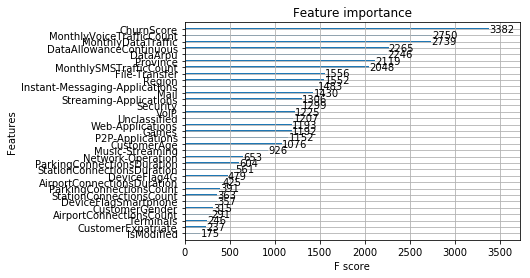

Feature_Importances: 
Index(['CustomerExpatriate', 'DeviceFlagSmartphone', 'MonthlySMSTrafficCount',
       'DataArpu', 'DeviceFlag4G', 'Region', 'MonthlyVoiceTrafficCount',
       'ParkingConnectionsCount', 'CustomerAge', 'Games',
       'Instant-Messaging-Applications', 'Security', 'P2P-Applications',
       'Unclassified', 'Terminals', 'VoIP', 'File-Transfer',
       'Network-Operation', 'IsModified', 'Mail', 'Music-Streaming',
       'StationConnectionsCount', 'AirportConnectionsCount', 'ID',
       'ChurnScore', 'ParkingConnectionsDuration',
       'StationConnectionsDuration', 'DataAllowanceContinuous'],
      dtype='object')
Model: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 0, 'missing': None, 'n_estimators': 36, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': 1, 'su

In [21]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(
        learning_rate =learning_rate,
        n_estimators=1000,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='multi:softprob', 
        num_class=4,
        nthread=4,
        scale_pos_weight=1,
        seed=27)
n_estimators = modelfit(xgb2, train, predictors,28)

# Tune subsample and colsample_bytree

In [22]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   47.4s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  1.6min finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59245, std: 0.00805, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.59423, std: 0.00740, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.59433, std: 0.00527, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.59663, std: 0.00735, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.58984, std: 0.00980, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.59590, std: 0.00859, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.59486, std: 0.00607, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.59590, std: 0.00908, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.59632, std: 0.00882, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.59768, std: 0.01030, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.59883, std: 0.00942, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.59925, std: 0.00737, params: {'colsample_bytree': 0.8, 'subsample'

In [23]:
subsample = gsearch4.best_params_['subsample']
colsample_bytree = gsearch4.best_params_['colsample_bytree']
subsample,colsample_bytree

(0.9, 0.8)

In [24]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test5 = {
    'subsample':[i/100.0 for i in range(int(subsample*100-5),int(subsample*100+5),5)],
    'colsample_bytree':[i/100.0 for i in range(int(colsample_bytree*100-5),int(colsample_bytree*100+5),5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test5, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   24.7s finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59486, std: 0.00567, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: 0.59433, std: 0.00759, params: {'colsample_bytree': 0.75, 'subsample': 0.9},
  mean: 0.59277, std: 0.00833, params: {'colsample_bytree': 0.8, 'subsample': 0.85},
  mean: 0.59925, std: 0.00737, params: {'colsample_bytree': 0.8, 'subsample': 0.9}],
 {'colsample_bytree': 0.8, 'subsample': 0.9},
 0.5992470371743911)

In [25]:
subsample = gsearch5.best_params_['subsample']
colsample_bytree = gsearch5.best_params_['colsample_bytree']
subsample,colsample_bytree

(0.9, 0.8)

# regularization:

In [26]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='f1_micro',n_jobs=4,iid=False, cv=cv, verbose=1)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   32.5s finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59747, std: 0.00939, params: {'reg_alpha': 1e-05},
  mean: 0.59538, std: 0.00656, params: {'reg_alpha': 0.01},
  mean: 0.59528, std: 0.00589, params: {'reg_alpha': 0.1},
  mean: 0.59559, std: 0.00804, params: {'reg_alpha': 1},
  mean: 0.56329, std: 0.00154, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.5974697240536384)

In [27]:
reg_alpha = gsearch6.best_params_['reg_alpha']
reg_alpha

1e-05

In [28]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test7 = {
    'reg_alpha':[0, 0.01, 0.05, 0.1, 0.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                        min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
                                        objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test7, scoring='f1_micro',n_jobs=4,iid=False, cv=cv,verbose=1)
gsearch7.fit(train[predictors],train[target])
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   36.3s finished
C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.59925, std: 0.00737, params: {'reg_alpha': 0},
  mean: 0.59538, std: 0.00656, params: {'reg_alpha': 0.01},
  mean: 0.59611, std: 0.00503, params: {'reg_alpha': 0.05},
  mean: 0.59528, std: 0.00589, params: {'reg_alpha': 0.1},
  mean: 0.59653, std: 0.00665, params: {'reg_alpha': 0.5}],
 {'reg_alpha': 0},
 0.5992470371743911)

In [29]:
reg_alpha = gsearch7.best_params_['reg_alpha']
reg_alpha

0

[0]	train-merror:0.244852+0.00603173	train-mlogloss:1.29803+0.00129218	test-merror:0.449464+0.0124691	test-mlogloss:1.33182+0.00146999
[1]	train-merror:0.202414+0.0056694	train-mlogloss:1.21961+0.00197687	test-merror:0.424794+0.00728837	test-mlogloss:1.28485+0.00323369
[2]	train-merror:0.18279+0.00447485	train-mlogloss:1.14947+0.00267341	test-merror:0.415805+0.00824254	test-mlogloss:1.24629+0.00460424
[3]	train-merror:0.173513+0.00545254	train-mlogloss:1.08828+0.00335346	test-merror:0.412147+0.00802537	test-mlogloss:1.21415+0.00505242
[4]	train-merror:0.166144+0.00308549	train-mlogloss:1.03229+0.00295399	test-merror:0.410996+0.00897995	test-mlogloss:1.1862+0.00585422
[5]	train-merror:0.159428+0.00231089	train-mlogloss:0.982445+0.00341069	test-merror:0.406711+0.0079314	test-mlogloss:1.16146+0.00672129
[6]	train-merror:0.15253+0.00436408	train-mlogloss:0.936357+0.00367711	test-merror:0.404517+0.00571931	test-mlogloss:1.13955+0.00749324
[7]	train-merror:0.146075+0.00263801	train-mlogloss:

[60]	train-merror:0.0339188+0.00228127	train-mlogloss:0.264153+0.00586553	test-merror:0.402112+0.0069637	test-mlogloss:0.998111+0.0170357
[61]	train-merror:0.0335266+0.00201948	train-mlogloss:0.261105+0.00599685	test-merror:0.401694+0.00692421	test-mlogloss:0.998512+0.0169069
[62]	train-merror:0.0332654+0.00193469	train-mlogloss:0.258509+0.00611917	test-merror:0.400544+0.00636273	test-mlogloss:0.999048+0.0171897
[63]	train-merror:0.032586+0.00211563	train-mlogloss:0.255582+0.0060053	test-merror:0.401381+0.00624214	test-mlogloss:0.999534+0.0172904
[64]	train-merror:0.0319588+0.00192297	train-mlogloss:0.252707+0.00535253	test-merror:0.401172+0.00664325	test-mlogloss:1.00012+0.0174064
[65]	train-merror:0.0315408+0.00192624	train-mlogloss:0.250003+0.00519504	test-merror:0.400858+0.00645553	test-mlogloss:1.00052+0.0174693
[66]	train-merror:0.030992+0.0019169	train-mlogloss:0.247353+0.00518884	test-merror:0.400963+0.00703295	test-mlogloss:1.00106+0.0176254
[67]	train-merror:0.0304692+0.00195

[120]	train-merror:0.0165152+0.00138944	train-mlogloss:0.157914+0.00398107	test-merror:0.399081+0.00922259	test-mlogloss:1.03175+0.0211588
[121]	train-merror:0.0161752+0.00143209	train-mlogloss:0.156944+0.00402634	test-merror:0.398767+0.00827688	test-mlogloss:1.0322+0.0211357
[122]	train-merror:0.0159142+0.00111306	train-mlogloss:0.155952+0.00381626	test-merror:0.399081+0.00841114	test-mlogloss:1.0328+0.0211532
[123]	train-merror:0.0158616+0.00118505	train-mlogloss:0.154898+0.00373266	test-merror:0.398976+0.00842801	test-mlogloss:1.03329+0.0214371
[124]	train-merror:0.0158356+0.00132098	train-mlogloss:0.153948+0.00360588	test-merror:0.399603+0.00852982	test-mlogloss:1.03388+0.0214409
[125]	train-merror:0.015679+0.00126142	train-mlogloss:0.153061+0.00366347	test-merror:0.399604+0.00875479	test-mlogloss:1.03449+0.0212776
[126]	train-merror:0.0154962+0.00130055	train-mlogloss:0.152151+0.00357852	test-merror:0.400022+0.00827937	test-mlogloss:1.03493+0.0214253
[127]	train-merror:0.0154962+0

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9338
f1_micro : 0.9338
f1_macro : 0.915
f1_weighted : 0.9327


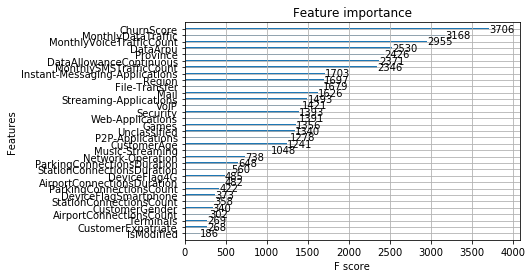

Feature_Importances: 
Index(['CustomerExpatriate', 'MonthlySMSTrafficCount', 'DeviceFlagSmartphone',
       'DeviceFlag4G', 'Region', 'DataArpu', 'MonthlyVoiceTrafficCount',
       'Games', 'CustomerAge', 'ParkingConnectionsCount',
       'Instant-Messaging-Applications', 'Security', 'Unclassified',
       'P2P-Applications', 'VoIP', 'File-Transfer', 'Terminals',
       'Network-Operation', 'IsModified', 'Mail', 'Music-Streaming',
       'StationConnectionsCount', 'AirportConnectionsCount', 'ID',
       'ChurnScore', 'ParkingConnectionsDuration', 'DataAllowanceContinuous',
       'StationConnectionsDuration'],
      dtype='object')
Model: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 0, 'missing': None, 'n_estimators': 39, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': 1, 'su

In [30]:
xgb3 = XGBClassifier(
        learning_rate =learning_rate,
        n_estimators=1000,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        objective='multi:softprob', 
        num_class=4,
        nthread=4,
        scale_pos_weight=1,
        seed=27)
n_estimators = modelfit(xgb3, train, predictors, 28)

[0]	train-merror:0.244852+0.00603173	train-mlogloss:1.37722+0.000132522	test-merror:0.449464+0.0124691	test-mlogloss:1.38061+0.000146149
[1]	train-merror:0.206831+0.00601992	train-mlogloss:1.36812+0.000208086	test-merror:0.426048+0.0069401	test-mlogloss:1.37492+0.000324018
[2]	train-merror:0.191622+0.00549986	train-mlogloss:1.3591+0.000345325	test-merror:0.416641+0.00755508	test-mlogloss:1.36945+0.000527508
[3]	train-merror:0.185141+0.00676766	train-mlogloss:1.35038+0.000512554	test-merror:0.412041+0.00611934	test-mlogloss:1.36409+0.000648254
[4]	train-merror:0.182424+0.00460219	train-mlogloss:1.34164+0.000566088	test-merror:0.408801+0.00771449	test-mlogloss:1.35874+0.000752771
[5]	train-merror:0.179314+0.0050675	train-mlogloss:1.33306+0.000615575	test-merror:0.405979+0.00521596	test-mlogloss:1.35352+0.000910494
[6]	train-merror:0.178713+0.00530357	train-mlogloss:1.32466+0.000583787	test-merror:0.411519+0.00595603	test-mlogloss:1.34844+0.00102526
[7]	train-merror:0.175996+0.00388353	tr

[61]	train-merror:0.142286+0.00334322	train-mlogloss:0.978305+0.0027367	test-merror:0.399081+0.00518494	test-mlogloss:1.15841+0.00441618
[62]	train-merror:0.141894+0.00329031	train-mlogloss:0.973618+0.00279955	test-merror:0.400439+0.00417717	test-mlogloss:1.15619+0.00439537
[63]	train-merror:0.141685+0.00308073	train-mlogloss:0.968883+0.00281044	test-merror:0.400126+0.003945	test-mlogloss:1.15392+0.00443866
[64]	train-merror:0.140666+0.0031437	train-mlogloss:0.964261+0.00290934	test-merror:0.399917+0.00422926	test-mlogloss:1.15178+0.00454128
[65]	train-merror:0.140483+0.00308071	train-mlogloss:0.959747+0.00297376	test-merror:0.400022+0.00506804	test-mlogloss:1.14963+0.00459704
[66]	train-merror:0.140352+0.00347154	train-mlogloss:0.955275+0.00299402	test-merror:0.400335+0.00470687	test-mlogloss:1.14757+0.00461143
[67]	train-merror:0.139803+0.0032356	train-mlogloss:0.950618+0.00300955	test-merror:0.400648+0.00411013	test-mlogloss:1.14541+0.0046425
[68]	train-merror:0.139594+0.00325595	tr

[121]	train-merror:0.117357+0.00360738	train-mlogloss:0.753161+0.00409381	test-merror:0.400125+0.00620208	test-mlogloss:1.06306+0.00722571
[122]	train-merror:0.116782+0.00331658	train-mlogloss:0.750309+0.00419833	test-merror:0.399916+0.00598785	test-mlogloss:1.062+0.0072243
[123]	train-merror:0.116573+0.00323925	train-mlogloss:0.747458+0.00423719	test-merror:0.400439+0.00598789	test-mlogloss:1.06096+0.00727829
[124]	train-merror:0.116076+0.00311297	train-mlogloss:0.744487+0.00424571	test-merror:0.400753+0.00602313	test-mlogloss:1.05987+0.00734171
[125]	train-merror:0.115553+0.00315999	train-mlogloss:0.741632+0.00425315	test-merror:0.401066+0.00649356	test-mlogloss:1.05886+0.00738504
[126]	train-merror:0.115266+0.00321838	train-mlogloss:0.738728+0.00428083	test-merror:0.400753+0.00651321	test-mlogloss:1.05781+0.00742436
[127]	train-merror:0.114743+0.00302084	train-mlogloss:0.735877+0.00429653	test-merror:0.400753+0.0060214	test-mlogloss:1.05677+0.0074508
[128]	train-merror:0.114456+0.00

[181]	train-merror:0.0967124+0.00311443	train-mlogloss:0.607311+0.00586926	test-merror:0.399394+0.00548468	test-mlogloss:1.01762+0.0098463
[182]	train-merror:0.0962162+0.0031311	train-mlogloss:0.605318+0.00597624	test-merror:0.399499+0.00520844	test-mlogloss:1.01707+0.00983842
[183]	train-merror:0.0958242+0.00302032	train-mlogloss:0.603291+0.0060044	test-merror:0.399185+0.00524109	test-mlogloss:1.01655+0.0098564
[184]	train-merror:0.09538+0.00315148	train-mlogloss:0.601203+0.00601505	test-merror:0.39908+0.00506543	test-mlogloss:1.01602+0.00986075
[185]	train-merror:0.095197+0.00310115	train-mlogloss:0.599282+0.00608366	test-merror:0.398976+0.00529987	test-mlogloss:1.01552+0.00988492
[186]	train-merror:0.0946744+0.00319544	train-mlogloss:0.597367+0.00609605	test-merror:0.398872+0.00500314	test-mlogloss:1.01502+0.0099278
[187]	train-merror:0.094439+0.00313535	train-mlogloss:0.595426+0.00612056	test-merror:0.398767+0.0053907	test-mlogloss:1.01453+0.00997696
[188]	train-merror:0.0942824+0.

[241]	train-merror:0.0790998+0.00337857	train-mlogloss:0.507292+0.00678464	test-merror:0.398767+0.00499442	test-mlogloss:0.996218+0.0112816
[242]	train-merror:0.0788648+0.00352151	train-mlogloss:0.505942+0.0067899	test-merror:0.398767+0.00507472	test-mlogloss:0.995988+0.0112778
[243]	train-merror:0.0785252+0.00363795	train-mlogloss:0.504551+0.00676326	test-merror:0.398871+0.00524968	test-mlogloss:0.995776+0.0113284
[244]	train-merror:0.0781068+0.00358623	train-mlogloss:0.503186+0.00684649	test-merror:0.398872+0.00552783	test-mlogloss:0.995565+0.0113739
[245]	train-merror:0.0779764+0.00366438	train-mlogloss:0.501861+0.00696184	test-merror:0.398662+0.00501638	test-mlogloss:0.995354+0.0113308
[246]	train-merror:0.0775582+0.00376872	train-mlogloss:0.50047+0.00690363	test-merror:0.398767+0.00488817	test-mlogloss:0.995091+0.0113331
[247]	train-merror:0.07748+0.0037893	train-mlogloss:0.499112+0.00693023	test-merror:0.398976+0.00547984	test-mlogloss:0.994876+0.0113323
[248]	train-merror:0.0771

[300]	train-merror:0.0650412+0.00343172	train-mlogloss:0.437125+0.00720314	test-merror:0.398558+0.00585499	test-mlogloss:0.986896+0.0121397
[301]	train-merror:0.064806+0.00329638	train-mlogloss:0.43611+0.00719816	test-merror:0.398454+0.00564428	test-mlogloss:0.986818+0.0121295
[302]	train-merror:0.0644402+0.00332552	train-mlogloss:0.434998+0.00721408	test-merror:0.398245+0.00574837	test-mlogloss:0.986745+0.0121334
[303]	train-merror:0.0641004+0.00318533	train-mlogloss:0.434056+0.00719041	test-merror:0.398454+0.00569989	test-mlogloss:0.986646+0.0121175
[304]	train-merror:0.0640222+0.0030901	train-mlogloss:0.433049+0.0072001	test-merror:0.398663+0.00602705	test-mlogloss:0.98651+0.0121452
[305]	train-merror:0.063761+0.00325078	train-mlogloss:0.432062+0.00719767	test-merror:0.398245+0.00629988	test-mlogloss:0.986468+0.0121476
[306]	train-merror:0.0635778+0.00316301	train-mlogloss:0.431025+0.00719723	test-merror:0.398558+0.00610313	test-mlogloss:0.986394+0.0122119
[307]	train-merror:0.06342

[359]	train-merror:0.054484+0.00267228	train-mlogloss:0.384796+0.00708163	test-merror:0.397408+0.00553501	test-mlogloss:0.983916+0.0130347
[360]	train-merror:0.054275+0.00257257	train-mlogloss:0.383981+0.00708729	test-merror:0.397617+0.00588098	test-mlogloss:0.983943+0.0130342
[361]	train-merror:0.054118+0.00266476	train-mlogloss:0.383235+0.00705622	test-merror:0.397199+0.00591001	test-mlogloss:0.983883+0.0130414
[362]	train-merror:0.0540138+0.00260431	train-mlogloss:0.382444+0.00703696	test-merror:0.39699+0.00596768	test-mlogloss:0.983826+0.0130905
[363]	train-merror:0.0539092+0.00260816	train-mlogloss:0.381637+0.00700548	test-merror:0.397513+0.00610918	test-mlogloss:0.983799+0.0131203
[364]	train-merror:0.053726+0.00260685	train-mlogloss:0.380921+0.00701883	test-merror:0.397513+0.00610918	test-mlogloss:0.983803+0.0131255
[365]	train-merror:0.0535432+0.00266276	train-mlogloss:0.380161+0.00703263	test-merror:0.398036+0.00588116	test-mlogloss:0.983821+0.0131344
[366]	train-merror:0.0532

[418]	train-merror:0.047246+0.00216389	train-mlogloss:0.345193+0.00655342	test-merror:0.397722+0.00484103	test-mlogloss:0.983666+0.0135982
[419]	train-merror:0.047115+0.00216864	train-mlogloss:0.344648+0.00651069	test-merror:0.397826+0.0048498	test-mlogloss:0.98367+0.0136177
[420]	train-merror:0.0470364+0.00222221	train-mlogloss:0.34406+0.00649038	test-merror:0.39814+0.00513963	test-mlogloss:0.983673+0.0136114
[421]	train-merror:0.046932+0.00207862	train-mlogloss:0.343493+0.0064818	test-merror:0.397931+0.00484686	test-mlogloss:0.983666+0.0136279
[422]	train-merror:0.0468798+0.0021634	train-mlogloss:0.342921+0.00647434	test-merror:0.39814+0.00520707	test-mlogloss:0.983681+0.0136069
[423]	train-merror:0.046749+0.00207853	train-mlogloss:0.342393+0.00643122	test-merror:0.398244+0.00530815	test-mlogloss:0.983688+0.0136225
[424]	train-merror:0.0466184+0.00205547	train-mlogloss:0.341809+0.00640134	test-merror:0.39814+0.00542658	test-mlogloss:0.983716+0.0136216
[425]	train-merror:0.0465402+0.0

[477]	train-merror:0.0417318+0.00230208	train-mlogloss:0.314568+0.00592168	test-merror:0.398662+0.0062784	test-mlogloss:0.984879+0.0141796
[478]	train-merror:0.0417058+0.00221713	train-mlogloss:0.314166+0.00592679	test-merror:0.398767+0.00633384	test-mlogloss:0.984904+0.0142001
[479]	train-merror:0.0415492+0.00219333	train-mlogloss:0.313686+0.00594555	test-merror:0.398453+0.00585974	test-mlogloss:0.984988+0.0141791
[480]	train-merror:0.0414186+0.00212844	train-mlogloss:0.313228+0.00586385	test-merror:0.398558+0.00624075	test-mlogloss:0.984997+0.014191
[481]	train-merror:0.04134+0.00211327	train-mlogloss:0.312767+0.00589814	test-merror:0.398558+0.00624075	test-mlogloss:0.985065+0.0142017
[482]	train-merror:0.0411834+0.00216097	train-mlogloss:0.312311+0.00589663	test-merror:0.398558+0.0060213	test-mlogloss:0.985106+0.0142145
[483]	train-merror:0.040922+0.00203911	train-mlogloss:0.311814+0.00586315	test-merror:0.398662+0.00600277	test-mlogloss:0.985136+0.014195
[484]	train-merror:0.040869

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9394
f1_micro : 0.9394
f1_macro : 0.9233
f1_weighted : 0.9384


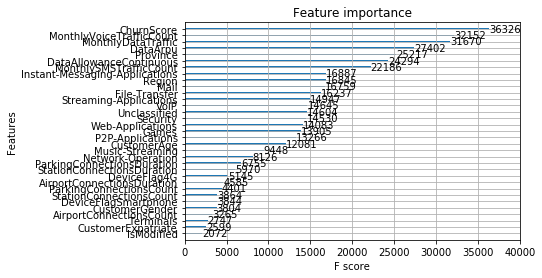

Feature_Importances: 
Index(['CustomerExpatriate', 'DeviceFlagSmartphone', 'MonthlySMSTrafficCount',
       'DeviceFlag4G', 'Region', 'DataArpu', 'MonthlyVoiceTrafficCount',
       'Games', 'CustomerAge', 'Instant-Messaging-Applications',
       'ParkingConnectionsCount', 'Security', 'Unclassified', 'Terminals',
       'P2P-Applications', 'VoIP', 'File-Transfer', 'Network-Operation',
       'IsModified', 'Mail', 'Music-Streaming', 'StationConnectionsCount',
       'AirportConnectionsCount', 'ID', 'ChurnScore',
       'ParkingConnectionsDuration', 'StationConnectionsDuration',
       'DataAllowanceContinuous'],
      dtype='object')
Model: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 0, 'missing': None, 'n_estimators': 400, 'nthread': 4, 'objective': 'multi:softprob', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 27, 'silent': 1, '

In [31]:
xgb4 = XGBClassifier(
        learning_rate =0.01,
        n_estimators=5000,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        objective='multi:softprob', 
        num_class=4,
        nthread=4,
        scale_pos_weight=1,
        seed=27)
n_estimators = modelfit(xgb4, train, predictors, 28)

In [32]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
# param_test8 = {
#     #learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#     'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
#     'n_estimators' : [50, 100, 150, 200, 300, 5000]
# }
# gsearch8 = GridSearchCV(estimator = XGBClassifier(  max_depth=max_depth,
#                                         min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree,
#                                         objective='multi:softprob', num_class=4, nthread=4, scale_pos_weight=1,seed=27), 
#                        param_grid = param_test8, scoring='f1_micro',n_jobs=4,iid=False, cv=cv,verbose=1)
# gsearch8.fit(train[predictors],train[target])
# gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

In [33]:
train.columns

Index(['ID', 'DeviceFlag4G', 'DataArpu', 'DataAllowanceContinuous',
       'DeviceFlagSmartphone', 'MonthlyVoiceTrafficCount',
       'MonthlySMSTrafficCount', 'MonthlyDataTraffic', 'CustomerGender',
       'CustomerExpatriate', 'ChurnScore', 'AirportConnectionsDuration',
       'AirportConnectionsCount', 'StationConnectionsDuration',
       'StationConnectionsCount', 'ParkingConnectionsDuration',
       'ParkingConnectionsCount', 'File-Transfer', 'Games',
       'Instant-Messaging-Applications', 'Mail', 'Music-Streaming',
       'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'IsModified', 'CustomerAge', 'Region', 'Province',
       'Product'],
      dtype='object')

In [34]:
train[predictors].shape,train[target].shape,test[predictors].shape

((9567, 33), (9567,), (3190, 33))

In [35]:
pred = ['CustomerExpatriate', 'ZipCode', 'DeviceFlag4G',
       'MonthlySMSTrafficCount', 'DataArpu', 'DeviceFlagSmartphone', 'Region',
       'Instant-Messaging-Applications', 'MonthlyVoiceTrafficCount', 'Games']
train[pred].head()

KeyError: "['ZipCode'] not in index"

In [38]:
# X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], test_size=0.33, random_state=7)
# eval_set = [(X_test, y_test)]
predictors = [x for x in train.columns if x not in [target, IDcol]]
features = ['CustomerExpatriate', 'MonthlySMSTrafficCount', 'DeviceFlagSmartphone',
       'DeviceFlag4G', 'Region', 'DataArpu', 'MonthlyVoiceTrafficCount',
       'Games', 'CustomerAge', 'ParkingConnectionsCount',
       'Instant-Messaging-Applications', 'Security', 'Unclassified',
       'P2P-Applications', 'VoIP', 'File-Transfer', 'Terminals',
       'Network-Operation', 'IsModified', 'Mail', 'Music-Streaming',
       'StationConnectionsCount', 'AirportConnectionsCount', 'ID',
       'ChurnScore', 'ParkingConnectionsDuration', 'DataAllowanceContinuous',
       'StationConnectionsDuration']
xgb3.fit(train[features],
      train[target],
      eval_metric="merror",
      verbose=True)

y_pred_new_data = xgb3.predict(test[features])
predictions = [round(value) for value in y_pred_new_data]

print("F1 score on unseen data: %.3f%%" % (f1_score(train[target][0:3190], y_pred_new_data[0:3190], average='micro')*100))

F1 score on unseen data: 48.495%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
# X_train, X_test, y_train, y_test = train_test_split(train[predictors], train[target], test_size=0.33, random_state=7)
# eval_set = [(X_test, y_test)]
predictors = [x for x in train.columns if x not in [target, IDcol]]
features = ['CustomerExpatriate', 'DeviceFlagSmartphone', 'MonthlySMSTrafficCount',
       'DeviceFlag4G', 'Region', 'DataArpu', 'MonthlyVoiceTrafficCount',
       'Games', 'CustomerAge', 'Instant-Messaging-Applications',
       'ParkingConnectionsCount', 'Security', 'Unclassified', 'Terminals',
       'P2P-Applications', 'VoIP', 'File-Transfer', 'Network-Operation',
       'IsModified', 'Mail', 'Music-Streaming', 'StationConnectionsCount',
       'AirportConnectionsCount', 'ID', 'ChurnScore',
       'ParkingConnectionsDuration', 'StationConnectionsDuration',
       'DataAllowanceContinuous']
xgb4.fit(train[features],
      train[target],
      eval_metric="merror",
      verbose=True)

y_pred_new_data = xgb4.predict(test[features])
predictions = [round(value) for value in y_pred_new_data]

print("F1 score on unseen data: %.3f%%" % (f1_score(train[target][0:3190], y_pred_new_data[0:3190], average='micro')*100))

F1 score on unseen data: 48.871%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
features = ['CustomerExpatriate', 'ZipCode', 'DeviceFlag4G',
       'MonthlySMSTrafficCount', 'DataArpu', 'DeviceFlagSmartphone', 'Region',
       'Games', 'Instant-Messaging-Applications', 'MonthlyVoiceTrafficCount']
xgb = XGBClassifier(
                    learning_rate =0.1,
                    n_estimators=135,
                    max_depth=4,
                    min_child_weight=2,
                    gamma=0.0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    colsample_bylevel=1,
                    reg_alpha=0.05,
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    objective= 'multi:softprob',
                    num_class= 4)

xgb.fit(train[features],
      train[target],
      verbose=True)

y_pred_new_data = xgb.predict(test[features])
predictions = [round(value) for value in y_pred_new_data]

print("F1 score on unseen data: %.3f%%" % (f1_score(train[target][0:3190], y_pred_new_data[0:3190], average='micro')*100))
print("F1 score on unseen data: %.3f%%" % (f1_score(train[target][0:3190], y_pred_new_data[0:3190], average='macro')*100))
print("F1 score on unseen data: %.3f%%" % (f1_score(train[target][0:3190], y_pred_new_data[0:3190], average='weighted')*100))

In [ ]:
xgb

In [ ]:
pd.DataFrame({'Product': y_pred_new_data}).describe(),pd.DataFrame({'Product': predictions}).describe()

In [50]:
#{'Non-Customer': 0, 'V-Auto': 1, 'V-Bag': 2, 'V-Pet': 3}

y = pd.DataFrame({'Product': y_pred_new_data})
submit = test['ID']
submit = pd.DataFrame({'ID': submit})

pred = y
pred = pd.DataFrame({'Product': y_pred_new_data})

product = []
product = pred.Product
product.replace({ 
    int(0) : 'Non-Customer', 
    int(1) : 'V-Auto', 
    int(2) : 'V-Bag', 
    int(3) : 'V-Pet'},
    inplace=True)

submit = submit.join(product)
submit

,ID,Product
0,1261,Non-Customer
1,5764,Non-Customer
2,10617,Non-Customer
3,10687,Non-Customer
4,4111,Non-Customer
5,12058,V-Bag
6,1346,Non-Customer
7,9791,Non-Customer
8,1044,Non-Customer
9,2046,Non-Customer


In [51]:
submit.Product.describe()

count             3190
unique               4
top       Non-Customer
freq              2680
Name: Product, dtype: object

In [52]:
submit.to_csv('result_xgbfl.csv', index = False, encoding='utf-8')

In [46]:
# predictors = [x for x in train.columns if x not in [target]]
# # split data into X and y
# X = train[predictors]
# Y = train[target]
# # split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# # fit model on all training data
# model = xgb4
# model.fit(X_train, y_train)
# # make predictions for test data and evaluate
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# # Fit model using each importance as a threshold
# thresholds = sort(model.feature_importances_)
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(X_train)
#     # train model
#     selection_model = XGBClassifier(objective='multi:softprob', 
#         num_class=4)
#     selection_model.fit(select_X_train, y_train)
#     # eval model
#     select_X_test = selection.transform(X_test)
#     y_pred = selection_model.predict(select_X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test, predictions)
#     print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 61.08%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.005, n=34, Accuracy: 61.15%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.005, n=33, Accuracy: 61.02%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.006, n=32, Accuracy: 60.83%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.006, n=31, Accuracy: 60.83%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=30, Accuracy: 60.45%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.008, n=29, Accuracy: 60.73%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.008, n=28, Accuracy: 60.96%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.009, n=27, Accuracy: 60.92%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.009, n=26, Accuracy: 60.73%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.010, n=25, Accuracy: 60.83%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.013, n=24, Accuracy: 60.83%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.015, n=23, Accuracy: 60.86%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=22, Accuracy: 60.54%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.020, n=21, Accuracy: 60.70%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=20, Accuracy: 60.73%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.027, n=19, Accuracy: 60.26%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.028, n=18, Accuracy: 60.04%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.029, n=17, Accuracy: 60.13%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=16, Accuracy: 60.35%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=15, Accuracy: 60.13%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=14, Accuracy: 60.48%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=13, Accuracy: 60.10%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.033, n=12, Accuracy: 60.35%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.034, n=11, Accuracy: 60.42%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.034, n=10, Accuracy: 60.13%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.036, n=9, Accuracy: 60.13%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.045, n=8, Accuracy: 59.91%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.050, n=7, Accuracy: 59.50%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.053, n=6, Accuracy: 59.53%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.053, n=5, Accuracy: 59.34%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.061, n=4, Accuracy: 59.15%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.065, n=3, Accuracy: 58.96%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.074, n=2, Accuracy: 58.71%
Thresh=0.096, n=1, Accuracy: 57.19%


C:\Users\giano\Anaconda3\envs\voda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
thresholds = model.feature_importances_
thresholds

thresholds.argsort()[-34:][::-1]
train.columns[thresholds.argsort()[-34:][::-1]]

Index(['ID', 'ChurnScore', 'MonthlyVoiceTrafficCount', 'MonthlyDataTraffic',
       'Province', 'DataArpu', 'DataAllowanceContinuous',
       'MonthlySMSTrafficCount', 'Region', 'Instant-Messaging-Applications',
       'File-Transfer', 'Mail', 'Security', 'Streaming-Applications',
       'Web-Applications', 'Unclassified', 'VoIP', 'Games', 'P2P-Applications',
       'CustomerAge', 'Music-Streaming', 'Network-Operation',
       'ParkingConnectionsDuration', 'StationConnectionsDuration',
       'ParkingConnectionsCount', 'AirportConnectionsDuration', 'DeviceFlag4G',
       'DeviceFlagSmartphone', 'CustomerGender', 'StationConnectionsCount',
       'AirportConnectionsCount', 'Terminals', 'CustomerExpatriate',
       'IsModified'],
      dtype='object')

In [ ]:
res_top = pd.read_csv("result_xgb062.csv", delimiter=",")

In [ ]:
res_top.Product.describe()